# 1- Importing the Dependencies

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.stats import ttest_ind
import scipy.stats as stats

# 2- Dataset uploading

In [287]:
df = pd.read_csv('Student_dataset\Students_grading_Dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12216\1450947098.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('Student_dataset\Students_grading_Dataset.csv')


# 3- Data Cleaning and Preprocessing

In [288]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


# show the tail of dataframe

In [289]:
df.tail()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4
4999,S5999,Maria,Brown,student4999@university.com,Female,21,Engineering,83.92,83.24,53.47,...,69.25,77.86,F,29.2,No,Yes,PhD,Low,2,6.1


# show a sample of dataframe

In [290]:
df.sample(5)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4362,S5362,Omar,Williams,student4362@university.com,Female,21,CS,67.26,46.84,85.28,...,79.19,54.75,B,20.7,Yes,Yes,Bachelor's,High,1,4.0
1150,S2150,Ahmed,Williams,student1150@university.com,Female,18,Mathematics,63.43,91.41,41.99,...,82.01,96.86,A,8.7,No,No,NaN,Low,6,8.1
4903,S5903,John,Johnson,student4903@university.com,Female,20,CS,NaN,43.46,42.30,...,77.19,84.21,A,6.6,No,Yes,Master's,Medium,5,4.4
1702,S2702,Omar,Davis,student1702@university.com,Female,18,Engineering,58.33,50.16,65.00,...,94.26,77.09,C,11.2,Yes,Yes,High School,Medium,8,5.9
812,S1812,Ali,Jones,student812@university.com,Male,24,CS,55.26,71.31,66.56,...,62.85,61.07,C,22.3,No,Yes,Master's,Low,7,8.8


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

## df.info in dataframe

In [292]:
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()


info_lines = [line.strip() for line in info_str.split("\n") if line.strip()]
column_details = [line.split() for line in info_lines[5:]]

cleaned_data = []
for i,line in enumerate(column_details):
    if i > 22 :
        # print()
        col_name = " ".join(line[:-2])
        dtype1 = line[-2]
        dtype2 = line[-1]
        cleaned_data.append([col_name, dtype1,dtype2])
    else :
        # col_name = line[-4]
        col_name = " ".join(line[1:-3])
        non_null = line[-3]
        dtype = line[-1]
        cleaned_data.append([col_name, non_null, dtype])

df_info = pd.DataFrame(cleaned_data, columns=["Column", "Non-Null Count", "Dtype"])
df_info

,Column,Non-Null Count,Dtype
0,Student_ID,5000,object
1,First_Name,5000,object
2,Last_Name,5000,object
3,Email,5000,object
4,Gender,5000,object
5,Age,5000,int64
6,Department,5000,object
7,Attendance (%),4484,float64
8,Midterm_Score,5000,float64
9,Final_Score,5000,float64


In [293]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


## Drop dublicates

In [294]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


## summation of null values for each column

In [295]:
df.isna().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

## Handle missing values & clean data

In [296]:
df['Attendance (%)'].fillna(df['Attendance (%)'].median(), inplace=True) # median for skewed numerical data
df['Assignments_Avg'].fillna(df['Assignments_Avg'].median(), inplace=True)


df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode()[0], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12216\1833454098.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance (%)'].fillna(df['Attendance (%)'].median(), inplace=True) # median for skewed numerical data
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12216\1833454098.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

## Standrization categorical data

In [297]:
df['Gender'] = df['Gender'].str.lower().str.strip().replace({'m': 'male', 'f': 'female'}) # if exist m covert to male and f to female

# Exploratory Data Analysis (EDA)

## 1- Visualizing Data Distributions

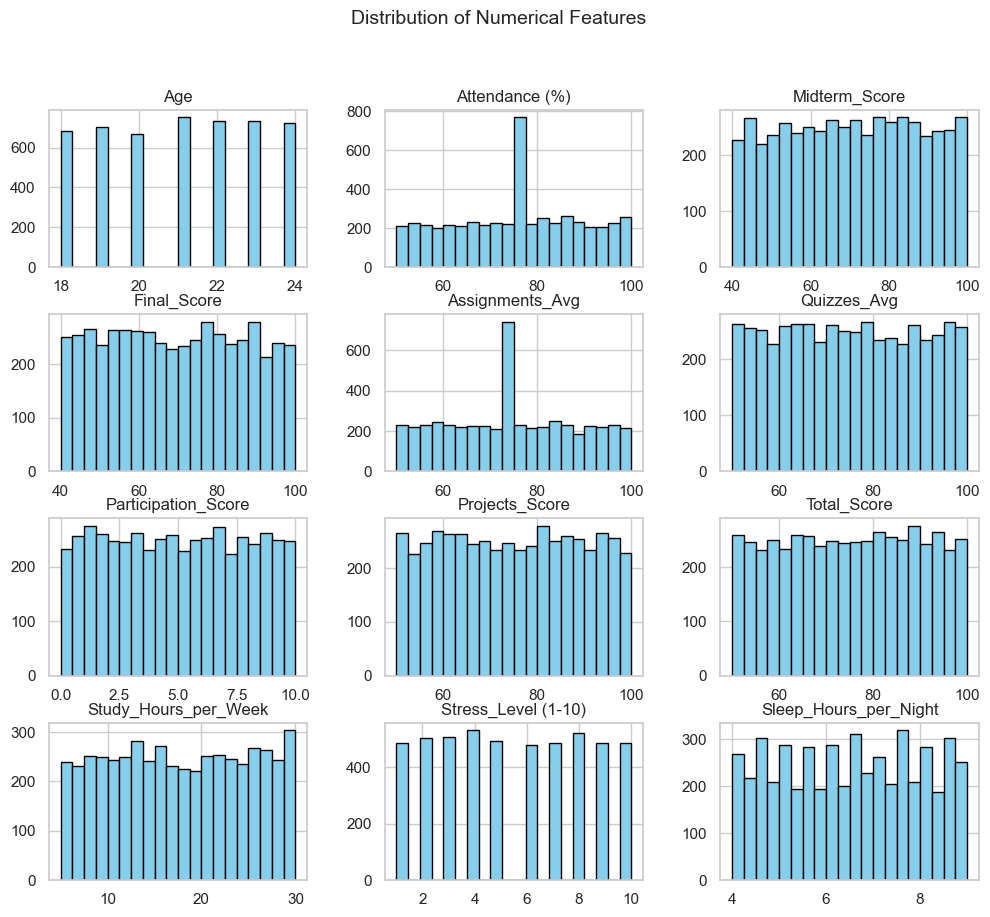

In [333]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

# 2- Identifying Outliers

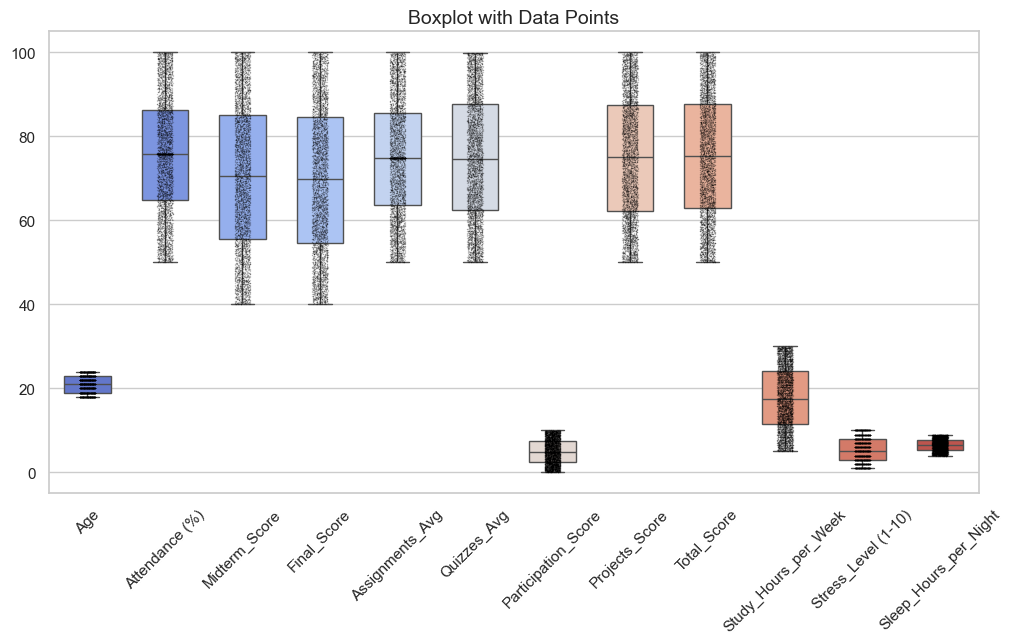

In [299]:
plt.figure(figsize=(12, 6))
numeric_cols = df.select_dtypes(include=['number']).columns

sns.boxplot(data=df[numeric_cols], palette='coolwarm', width=0.6)  # Boxplot
sns.stripplot(data=df[numeric_cols], color='black', alpha=0.2, size=1, jitter=True)  # Adds individual points

plt.title("Boxplot with Data Points", fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Relationship Between Study Hours and Total Score

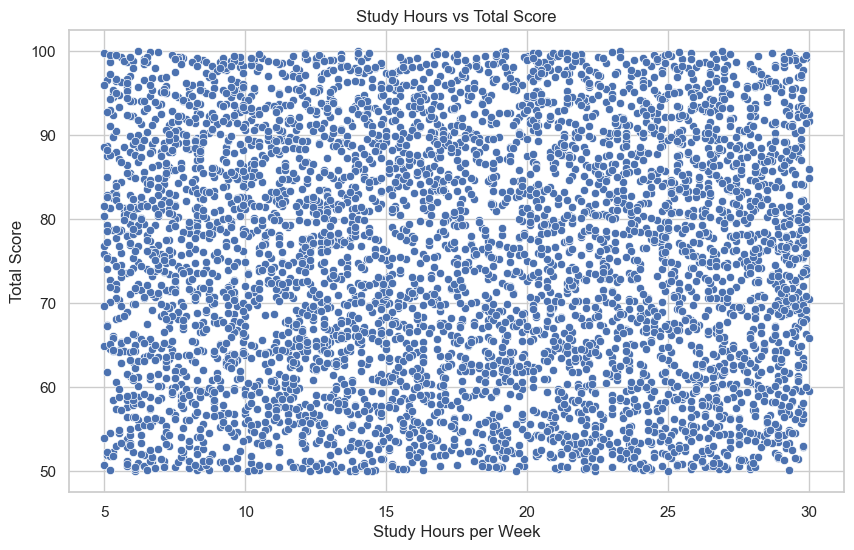

In [353]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Study_Hours_per_Week'], y=df['Total_Score'])
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.title('Study Hours vs Total Score')
plt.show()

## compares the distribution of Total Scores by Gender

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12216\1916139847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Total_Score'], y=df['Gender'], palette='viridis')


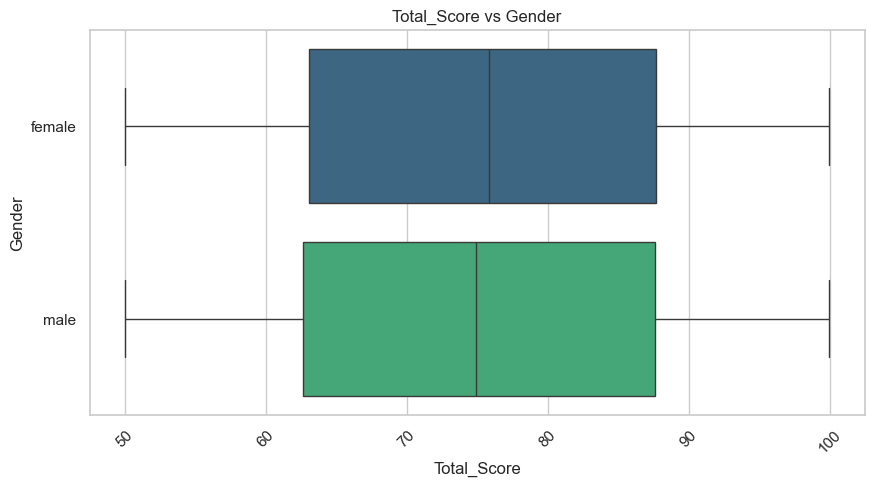

In [351]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Total_Score'], y=df['Gender'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Total_Score vs Gender")
plt.show()

## compares the distribution of Total Scores by Parent_Education_Level

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12216\874692537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Parent_Education_Level'], y=df['Total_Score'], palette='viridis')


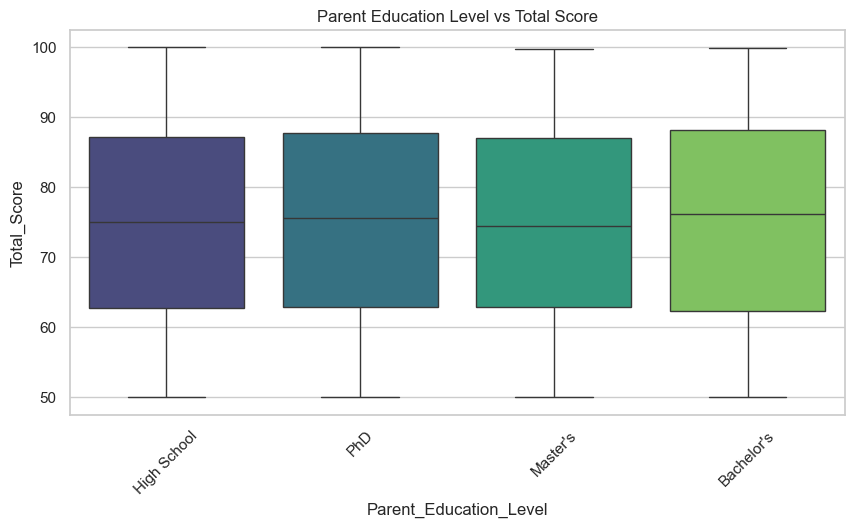

In [302]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Parent_Education_Level'], y=df['Total_Score'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Parent Education Level vs Total Score")
plt.show()

## pie chart for Distribution of Parent_Education_Level

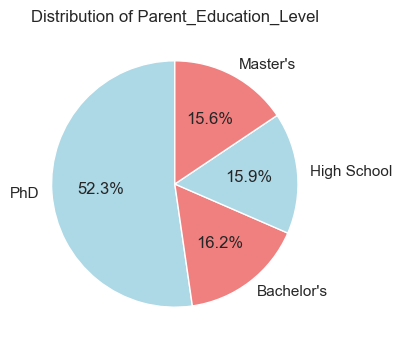

In [335]:
gender_score_distribution = df['Parent_Education_Level'].value_counts()  # for each gender sum the total_score
plt.figure(figsize=(6, 4))
plt.pie(gender_score_distribution, labels=gender_score_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title("Distribution of Parent_Education_Level")
plt.show()

## Pie chart for Department distribution

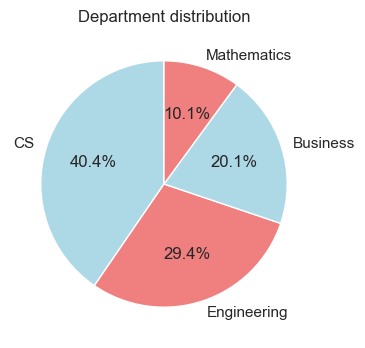

In [336]:
gender_score_distribution = df['Department'].value_counts() # for each gender sum the total_score
plt.figure(figsize=(5, 4))
plt.pie(gender_score_distribution, labels=gender_score_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title("Department distribution")
plt.show()

## Parent Education Level Distribution Across Grades

<Figure size 800x400 with 0 Axes>

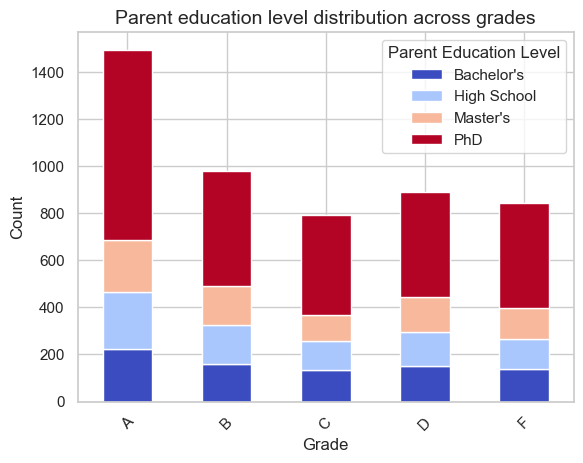

In [355]:
plt.figure(figsize=(8,4))
gender_score_dist = df.groupby('Grade')['Parent_Education_Level'].value_counts().unstack()
gender_score_dist.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Parent education level distribution across grades", fontsize=14)
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title="Parent Education Level")
plt.xticks(rotation=45)
plt.show()

## Parent Income vs. Parent Education Level:

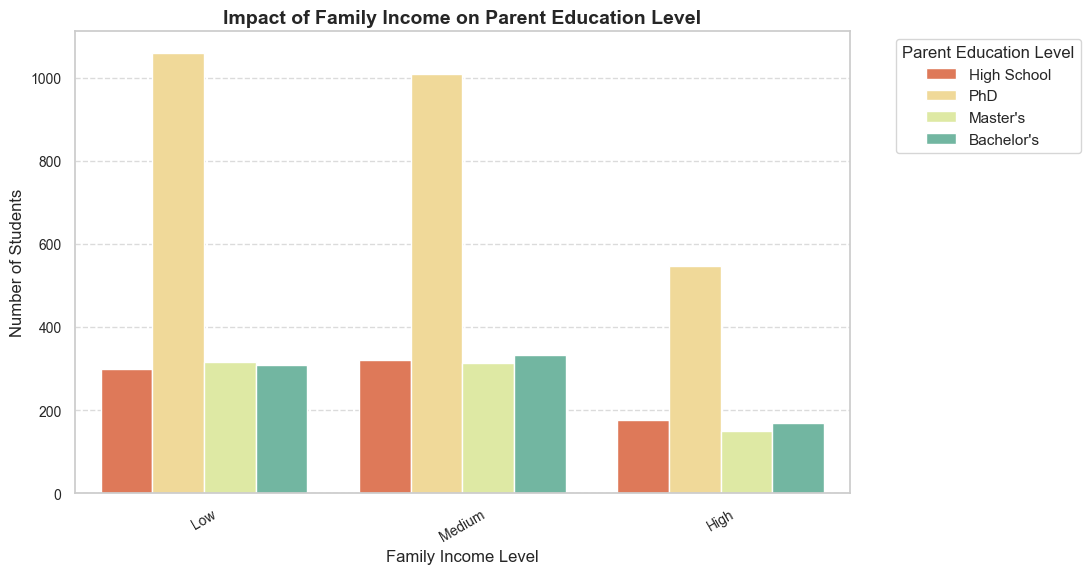

In [367]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x=df['Family_Income_Level'], 
    hue=df['Parent_Education_Level'], 
    palette="Spectral",  
    order=["Low", "Medium", "High"]
)

plt.xlabel("Family Income Level", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.title("Impact of Family Income on Parent Education Level", fontsize=14, fontweight='bold')
plt.legend(title="Parent Education Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## 📊 Stress vs. Sleep Hours (Colored by Grade)

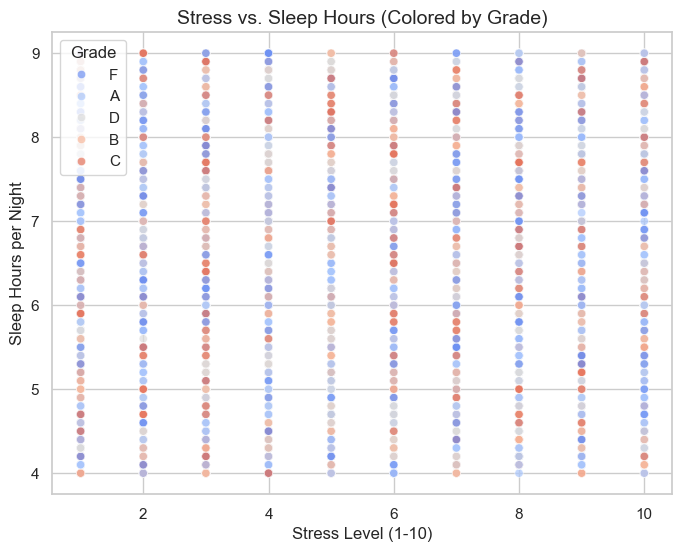

In [340]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Stress_Level (1-10)'], y=df['Sleep_Hours_per_Night'], hue=df['Grade'], alpha=0.7, palette='coolwarm')

plt.xlabel('Stress Level (1-10)', fontsize=12)
plt.ylabel('Sleep Hours per Night', fontsize=12)
plt.title('Stress vs. Sleep Hours (Colored by Grade)', fontsize=14)
plt.legend(title="Grade")
plt.grid(True)
plt.show()


## 📊 Stress vs. Sleep Hours (Colored by Grade)

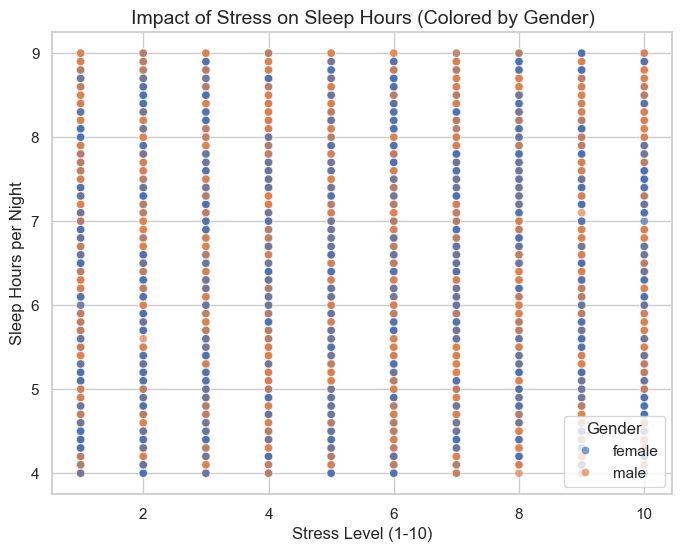

In [358]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Stress_Level (1-10)'], y=df['Sleep_Hours_per_Night'], hue=df['Gender'], alpha=0.7)

plt.xlabel('Stress Level (1-10)', fontsize=12)
plt.ylabel('Sleep Hours per Night', fontsize=12)
plt.title('Impact of Stress on Sleep Hours (Colored by Gender)', fontsize=14)
plt.legend(title="Gender")
plt.grid(True)

plt.show()


## Relation between Attendance and Total_Score

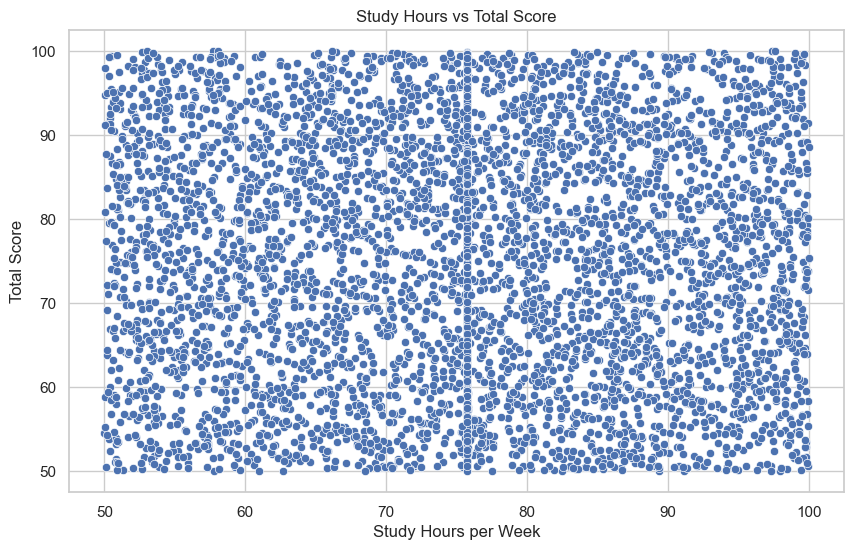

In [359]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Attendance (%)'], y=df['Total_Score'])
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.title('Study Hours vs Total Score')
plt.show()

# 3- Identifying Correlations and Patterns

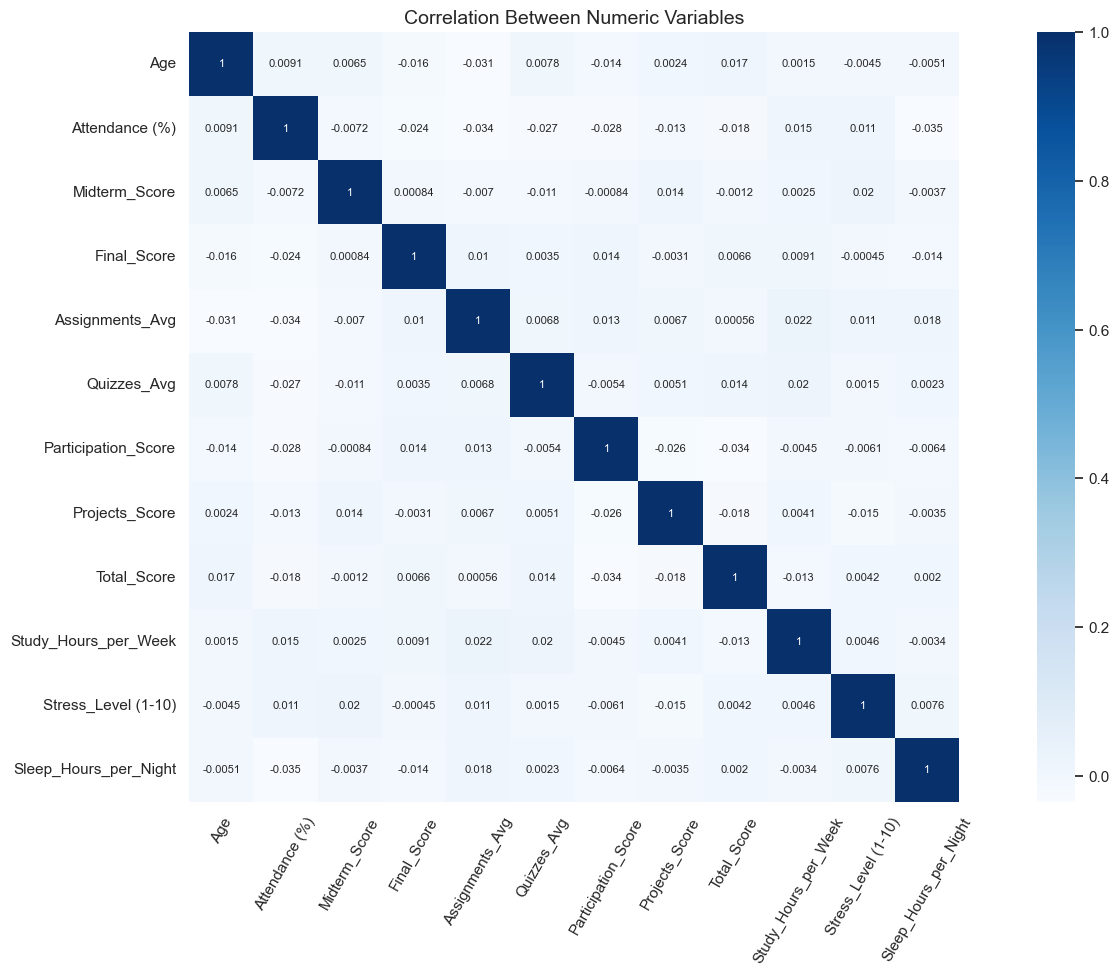

In [309]:
plt.figure(figsize=(20, 10))

numeric_df = df.select_dtypes(include=['number'])
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
sns.heatmap(numeric_df.corr(), cbar=True, square=True, annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Correlation Between Numeric Variables", fontsize=14)
plt.xticks(rotation=60)
plt.show()


## Hypothesis Testing (Effect of Gender on Total Score)

In [360]:
from scipy.stats import ttest_ind

male_scores = df[df['Gender'] == 'male']['Total_Score']
female_scores = df[df['Gender'] == 'female']['Total_Score']

t_stat, p_value = ttest_ind(male_scores, female_scores, nan_policy='omit')
print(f"T-Test Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Statistically significant difference in scores between genders.")
else:
    print("No significant difference in scores between genders.")


T-Test Statistic: -0.69, P-Value: 0.4886
No significant difference in scores between genders.


## Hypothesis Testing (Effect of Stress_Level on Sleep)

In [343]:
high_stress = df[df['Stress_Level (1-10)'] >= 7]['Sleep_Hours_per_Night']
low_stress = df[df['Stress_Level (1-10)'] < 7]['Sleep_Hours_per_Night']

t_stat, p_value = ttest_ind(high_stress, low_stress, nan_policy='omit')

print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference: Stress impacts sleep!")
else:
    print("No significant difference: Stress does not impact sleep.")


T-Statistic: 0.56, P-Value: 0.5749
No significant difference: Stress does not impact sleep.


## Hypothesis Testing (Effect of Parent_Education_Level on Grade)

In [349]:
contingency_table = pd.crosstab(df['Parent_Education_Level'], df['Grade'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant relationship: Parent's education level affects student grades!")
else:
    print("No significant relationship: Parent's education level does not impact student grades.")

Chi-Square Statistic: 10.32
P-Value: 0.5879
No significant relationship: Parent's education level does not impact student grades.
